# NAME : DEEPASHA MISHRA 
# TSF GRIP INTERNSHIP TASK 1 
# TASK 1 : Prediction using Supervised ML

In [1]:
# We begin by importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
# Importing the given dataset.
path =  "http://bit.ly/w-data"
Data = pd.read_csv(path)
print("Data is successfully imported")
Data

Data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
# SUMMARY OF THE GIVEN DATASET 

Data.info()
# We see, there are 25 observations, and two columns, namely, hours and scores.

Data.describe()
# Average scores obtained is 51.48 ; Average number of hours studied is 5.01.
# Minimum marks obtained : 17 ; Maximum marks obtained : 95
# Minimum hours spent on studying : 1.1 ; Maximum hours spent on studying : 9.2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


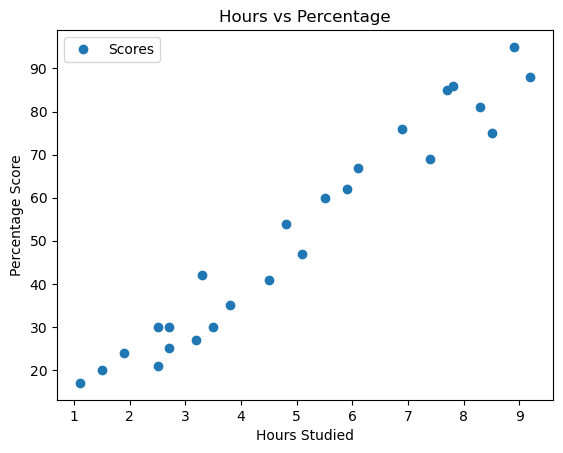

In [4]:
# To visually analyse the given dataset and understand the relation between the two variables : hours and scores, we plot a scatter plot between the two variables using Python.
Data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# We can see, there is a positive relation between the number of hours students study, and the percentage of scores the students get. The more they study the more are the scores obtained.

In [11]:
# Now we prepare the dataset as a model for regression

X = Data.iloc[:, :-1].values  
Y = Data.iloc[:, 1].values  
X
Y
# This way we will have our attributes and labels

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [41]:
# The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

# We have split our data into training and testing sets, and now is finally the time to train our algorithm.

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training of algorithm completed.")

Training of algorithm completed.


In [ ]:
# COEFFICIENTS OF THE MODEL :

#  Let B0 be the Intercept & B1 be the slope of our regression line.
print("B0 =",regressor.intercept_,"\nB1 =",regressor.coef_)

# We see, intercept of the model is 2.018, at zero hours spent on studying, the scores obtained are at 2.018
# Slope of the regression line is 9.9106, implying as there is a 1 hour chage in the time spent on studying, the increase in scores of student is 9.910

In [24]:
# We are ready to regress the model. Plotting the regression line:

Y0 = regressor.intercept_ + regressor.coef_*X_train
Y0

# This gives us the predictable values of the dependent variable.

array([[39.67865467],
       [20.84840735],
       [79.32128059],
       [70.40168976],
       [12.91988217],
       [52.56250809],
       [78.33021494],
       [34.72332643],
       [84.27660883],
       [93.19619966],
       [62.47316457],
       [36.70545772],
       [28.77693254],
       [56.52677068],
       [28.77693254],
       [86.25874013],
       [26.79480124],
       [49.58931115],
       [90.22300272],
       [46.6161142 ]])

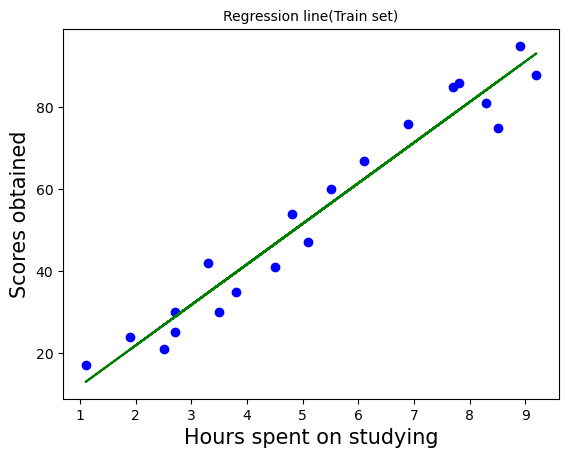

In [25]:
# We plot these values and the regression line using scatter plot as well

plt.scatter(X_train,Y_train,color='Blue')
plt.plot(X_train,Y0,color='Green')
plt.xlabel("Hours spent on studying",fontsize=15)
plt.ylabel("Scores obtained",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [26]:
# PREDICTION OF INDEPENDENT VARIABLE (hours)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
# PREDICTION OF DEPENDENT VARIABLE (scores)
Y_pred = regressor.predict(X_test)
Y_pred

# The predicted values will give us a better picture of the relation between the two variables.

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [36]:
# PREDICTING THE ERROR/RESIDUAL VALUES IN THE MODEL
# We can compare the prdicted with the actual to see how much is the error/residual present while we run the regression. This residual explains the change in the dependent variable that is not explained by the variables in the model.

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 
print(f'The residual set for the regression model is {Y_test-Y_pred}')

The resiual of the regression model is [ 3.11585524 -6.73226078 -6.357018    3.20519876  1.50896672]


In [37]:
# We can also check for accuracy of the model, using the Goodness of fit value of R square value. R square indicates the percentage of change in the independent vairable is expalined by the dependent variable
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

# R square  = 94.54% implies 94.54% change in Y can be explained by the X variable, that is hours spent.

0.9454906892105356

In [40]:
# QUESTION : WHAT WILL BE THE PREDICTED SCORE IF THE STUDENT STUDIES FOR 9.25 HOURS/DAY?

Prediction_score = regressor.predict([[9.25]])
print("According to the model, predicted score for a student studying 9.25 hours will be ",Prediction_score)

# We see, the predicted score for a student studying 9.25 hours will be 93.691.

According to the model, predicted score for a student studying 9.25 hours will be  [93.69173249]
